## Estadistica descriptiva

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_descriptiva = pd.read_excel("df_descriptiva.xlsx")

In [3]:
AU = data_descriptiva['Diagnostico_autismo']
counts = AU.value_counts()

labels = ['Autista', 'Alista']
mapped_values = ['Alista' if val == 0 else 'Autista' for val in AU]

## Histograma autista y alista

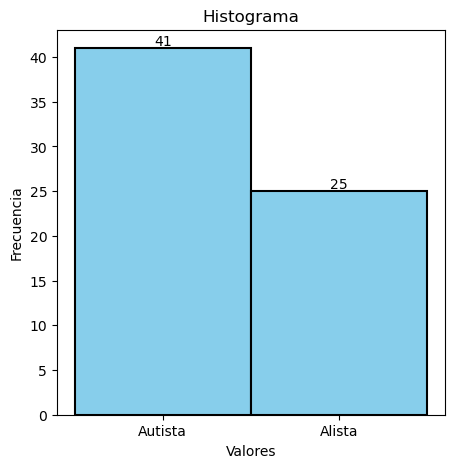

In [4]:
plt.figure(figsize=(5, 5))
plt.hist(mapped_values, bins=[-0.5, 0.5, 1.5], color='skyblue', linewidth=1.5, edgecolor='black') 

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Establecer los nombres personalizados en el eje x
plt.xticks(ticks=[0, 1], labels=labels)

plt.show()

## Histograma de edades

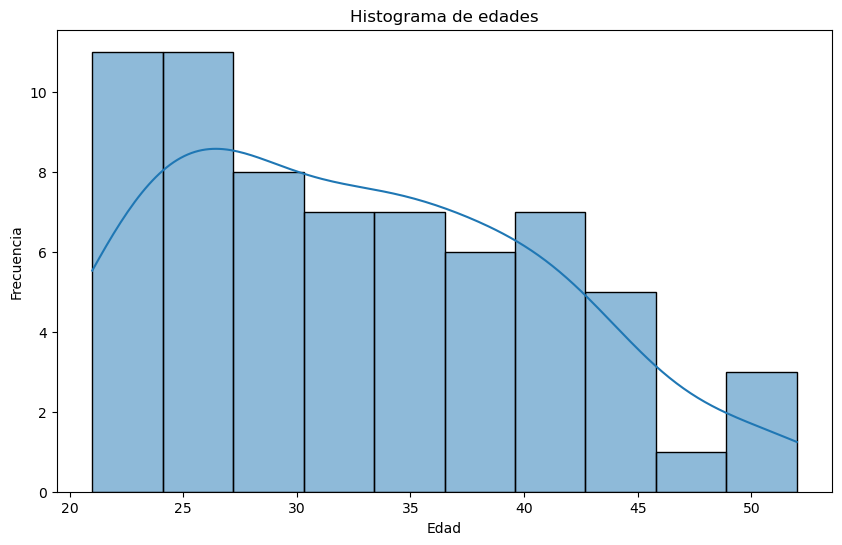

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data_descriptiva['Ingresa tu edad actual'], bins=10, kde=True)
plt.title('Histograma de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Histograma de edad de diagnóstico

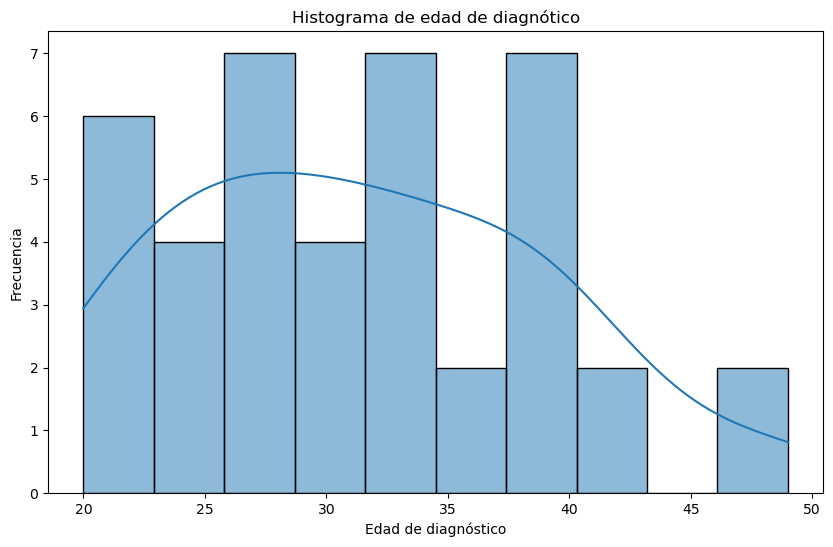

In [10]:
df_filtrado = data_descriptiva[data_descriptiva['¿A que edad recibiste el diagnóstico de autismo?'] != 0]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['¿A que edad recibiste el diagnóstico de autismo?'], bins=10, kde=True)
plt.title('Histograma de edad de diagnótico')
plt.xlabel('Edad de diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

## Histograma tiempo de diagnostico

C:\Users\Catalina Valle Ribé\AppData\Local\Temp\ipykernel_12600\196405025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Diferencia_edad_diagnostico'] =  df_filtrado['Ingresa tu edad actual'] - df_filtrado['¿A que edad recibiste el diagnóstico de autismo?']


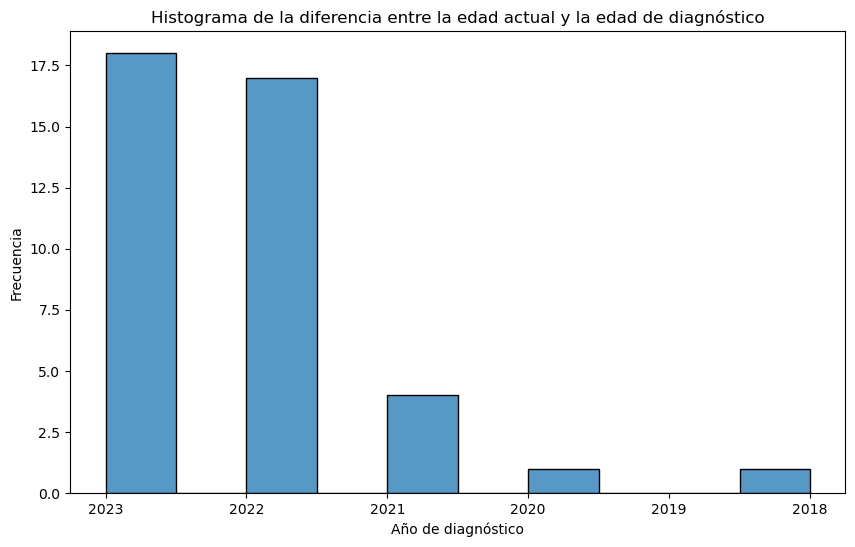

In [11]:
df_filtrado['Diferencia_edad_diagnostico'] =  df_filtrado['Ingresa tu edad actual'] - df_filtrado['¿A que edad recibiste el diagnóstico de autismo?']

plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['Diferencia_edad_diagnostico'], bins=10)
plt.title('Histograma de la diferencia entre la edad actual y la edad de diagnóstico')
plt.xlabel('Año de diagnóstico')
plt.ylabel('Frecuencia')
eje_x_nuevas_etiquetas = [2023 - i for i in range(6)]
plt.xticks(range(6), eje_x_nuevas_etiquetas)
plt.show()

## Otras Neurodivergencias

In [9]:
respuestas_separadas = df_filtrado['¿Alguna vez has sido diagnosticado/a con algunas de estas neurodivergencias?'].str.split(', ')

resumen = respuestas_separadas.explode().value_counts().reset_index()
resumen.columns = ['Respuesta', 'Frecuencia']

respuestas_a_eliminar = [
    'Sí',
    'Ansiedad social',
    'pero tengo AACC y sospecho ser TDAH también',
    'Altas Capacidades',
    'Tengo sospechas de Discalculia',
    'Dispraxia y TDAH'
]

resumen_filtrado = resumen[~resumen['Respuesta'].isin(respuestas_a_eliminar)]

print(resumen_filtrado[:-1])

                            Respuesta  Frecuencia
1                                  No          20
2                                TDAH          14
3  Trastorno por estrés postraumático           7
4       Trastorno obsesivo-compulsivo           5
5                            Dislexia           4
6                         Discalculia           3
7                           Dispraxia           2
8                                AACC           1
